# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# build query and request results
cities_found = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
speed = []
country = []
dt = []


for i, city in enumerate(cities):
    
    query_url = url + 'appid=' + weather_api_key + '&units=imperial' + '&q=' + city
    
    try:
        
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        #print(weather_json)

        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        dt.append(weather_json['dt'])

        cities_found.append(city)

        # Get the temperature from the response
        #print(f"The weather API responded with: {weather_json}.")
        print(f'Processing record {i + 1} of Set 1 | {city}')
    
    except:
        print("Error: " + city)

Processing record 1 of Set 1 | punta arenas
Processing record 2 of Set 1 | ponta do sol
Processing record 3 of Set 1 | bluff
Error: illoqqortoormiut
Processing record 5 of Set 1 | castro
Processing record 6 of Set 1 | barrow
Processing record 7 of Set 1 | ahipara
Processing record 8 of Set 1 | cape town
Processing record 9 of Set 1 | hobart
Processing record 10 of Set 1 | umm lajj
Processing record 11 of Set 1 | busselton
Error: tumannyy
Processing record 13 of Set 1 | qaanaaq
Processing record 14 of Set 1 | haines junction
Processing record 15 of Set 1 | atherton
Processing record 16 of Set 1 | arraial do cabo
Processing record 17 of Set 1 | gat
Processing record 18 of Set 1 | nishihara
Processing record 19 of Set 1 | airai
Error: mudyuga
Processing record 21 of Set 1 | ribeira grande
Processing record 22 of Set 1 | rikitea
Processing record 23 of Set 1 | bereznik
Processing record 24 of Set 1 | nizwa
Processing record 25 of Set 1 | kosonsoy
Error: kesennuma
Processing record 27 of Se

Processing record 211 of Set 1 | gornopravdinsk
Processing record 212 of Set 1 | kaitangata
Processing record 213 of Set 1 | provideniya
Processing record 214 of Set 1 | nanakuli
Processing record 215 of Set 1 | vila franca do campo
Processing record 216 of Set 1 | rincon
Processing record 217 of Set 1 | panguna
Processing record 218 of Set 1 | saint-prosper
Processing record 219 of Set 1 | dunedin
Processing record 220 of Set 1 | ovsyanka
Processing record 221 of Set 1 | valkla
Error: ijaki
Processing record 223 of Set 1 | tiksi
Processing record 224 of Set 1 | bellavista
Processing record 225 of Set 1 | poum
Processing record 226 of Set 1 | cidreira
Processing record 227 of Set 1 | katherine
Processing record 228 of Set 1 | esso
Processing record 229 of Set 1 | perelyub
Error: tungkang
Processing record 231 of Set 1 | anapskaya
Processing record 232 of Set 1 | sorland
Processing record 233 of Set 1 | mayo
Processing record 234 of Set 1 | mount isa
Processing record 235 of Set 1 | nec

Processing record 415 of Set 1 | lorengau
Processing record 416 of Set 1 | kibara
Processing record 417 of Set 1 | lamu
Error: ust-kamchatsk
Processing record 419 of Set 1 | itoman
Processing record 420 of Set 1 | ayan
Processing record 421 of Set 1 | ust-tsilma
Processing record 422 of Set 1 | buchanan
Processing record 423 of Set 1 | powell river
Processing record 424 of Set 1 | coihaique
Error: umzimvubu
Processing record 426 of Set 1 | leningradskiy
Processing record 427 of Set 1 | aquidauana
Processing record 428 of Set 1 | koping
Processing record 429 of Set 1 | atar
Processing record 430 of Set 1 | guangshui
Processing record 431 of Set 1 | ruteng
Processing record 432 of Set 1 | aguimes
Processing record 433 of Set 1 | roblin
Processing record 434 of Set 1 | nome
Processing record 435 of Set 1 | senno
Processing record 436 of Set 1 | pathein
Processing record 437 of Set 1 | kynashiv
Processing record 438 of Set 1 | seymchan
Processing record 439 of Set 1 | manching
Processing r

In [4]:
weather_dict = {
    "City": cities_found,
    "Latitude": lat,
    'Longitude': lng,
    "Max Temperature": temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': speed,
    'Country': country,
    'Date': dt
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,32.11,80,0,12.66,CL,1662515999
1,ponta do sol,32.6667,-17.1000,70.09,75,35,2.44,PT,1662515992
2,bluff,-46.6000,168.3333,41.81,71,67,12.44,NZ,1662515985
3,castro,-24.7911,-50.0119,53.51,98,100,9.71,BR,1662516063
4,barrow,71.2906,-156.7887,48.22,71,0,4.61,US,1662516094
...,...,...,...,...,...,...,...,...,...
546,russell,32.3502,-85.1999,76.62,94,0,0.00,US,1662516396
547,lilongwe,-13.9669,33.7873,63.45,46,0,4.63,MW,1662516396
548,mehamn,71.0357,27.8492,40.95,93,100,3.44,NO,1662516396
549,souillac,-20.5167,57.5167,67.57,80,67,9.95,MU,1662516397


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data.to_csv(
    path_or_buf = "../output_data/cities.csv"
)
weather_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,32.11,80,0,12.66,CL,1662515999
1,ponta do sol,32.6667,-17.1000,70.09,75,35,2.44,PT,1662515992
2,bluff,-46.6000,168.3333,41.81,71,67,12.44,NZ,1662515985
3,castro,-24.7911,-50.0119,53.51,98,100,9.71,BR,1662516063
4,barrow,71.2906,-156.7887,48.22,71,0,4.61,US,1662516094


In [8]:
weather_data.to_csv("../output_data/weather_data.csv", index = False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
print(f"The maximum humidity for the cities in the dataframe is {weather_data['Humidity'].max()}")


The maximum humidity for the cities in the dataframe is 100


In [15]:
#  Get the indices of cities that have humidity over 100%.
humidity_data_df = weather_data.loc[(weather_data['Humidity'] > 100)]
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,32.11,80,0,12.66,CL,1662515999
1,ponta do sol,32.6667,-17.1000,70.09,75,35,2.44,PT,1662515992
2,bluff,-46.6000,168.3333,41.81,71,67,12.44,NZ,1662515985
3,castro,-24.7911,-50.0119,53.51,98,100,9.71,BR,1662516063
4,barrow,71.2906,-156.7887,48.22,71,0,4.61,US,1662516094
...,...,...,...,...,...,...,...,...,...
546,russell,32.3502,-85.1999,76.62,94,0,0.00,US,1662516396
547,lilongwe,-13.9669,33.7873,63.45,46,0,4.63,MW,1662516396
548,mehamn,71.0357,27.8492,40.95,93,100,3.44,NO,1662516396
549,souillac,-20.5167,57.5167,67.57,80,67,9.95,MU,1662516397


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# clean_city_data = weather_data.drop([(weather_data['Humidity'] >= 100)])
# clean_city_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

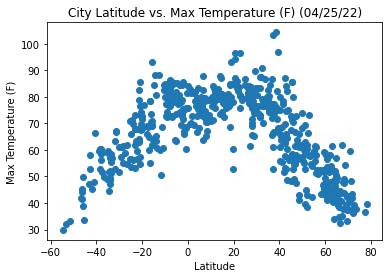

In [18]:
plt.title('City Latitude vs. Max Temperature (F) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

x1 = lat
y1 = temp

plt.scatter(x1, y1)

## Latitude vs. Humidity Plot

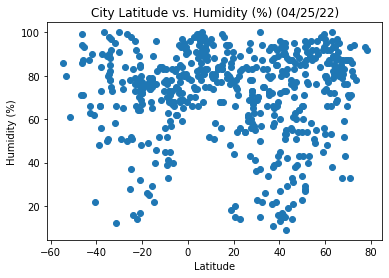

In [19]:
plt.title('City Latitude vs. Humidity (%) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

x2 = lat
y2 = humidity

plt.scatter(x2, y2)

## Latitude vs. Cloudiness Plot

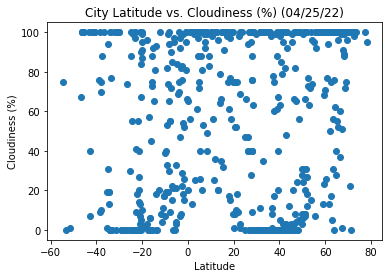

In [20]:
plt.title('City Latitude vs. Cloudiness (%) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

x3 = lat
y3 = clouds

plt.scatter(x3, y3)

## Latitude vs. Wind Speed Plot

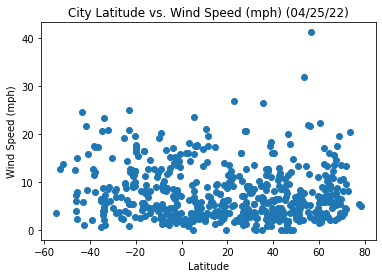

In [21]:
plt.title('City Latitude vs. Wind Speed (mph) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

x4 = lat
y4 = speed

plt.scatter(x4, y4)

## Linear Regression

In [22]:
lat_north = weather_data.loc[weather_data['Latitude'] > 0]
lat_south = weather_data.loc[weather_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is: 0.601498282646028


Text(0, 50, 'y = -0.58x + 88.15')

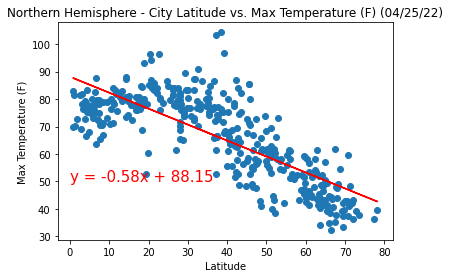

In [23]:
plt.title('Northern Hemisphere - City Latitude vs. Max Temperature (F) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

x5 = lat_north['Latitude']
y5 = lat_north['Max Temperature']

plt.scatter(x5, y5)

(slope, intercept, r, p, se) = linregress(x5, y5)
regress_values = x5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x5,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is: 0.6480236991569824


Text(0, 50, 'y = 0.77x + 82.01')

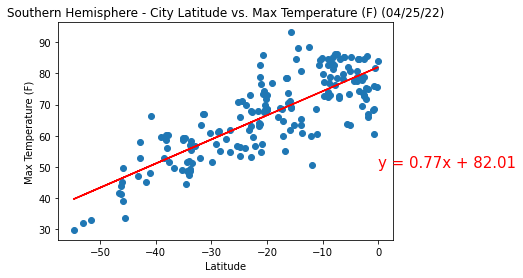

In [24]:
plt.title('Southern Hemisphere - City Latitude vs. Max Temperature (F) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

x6 = lat_south['Latitude']
y6 = lat_south['Max Temperature']

plt.scatter(x6, y6)

(slope, intercept, r, p, se) = linregress(x6, y6)
regress_values = x6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x6,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is: 0.004494343318111227


Text(0, 50, 'y = -0.07x + 74.59')

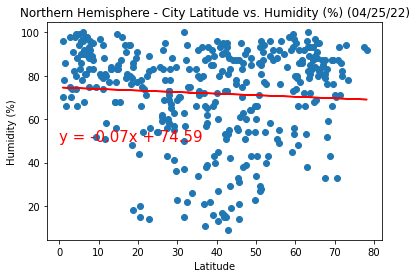

In [25]:
plt.title('Northern Hemisphere - City Latitude vs. Humidity (%) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

x7 = lat_north['Latitude']
y7 = lat_north['Humidity']

plt.scatter(x7, y7)

(slope, intercept, r, p, se) = linregress(x7, y7)
regress_values = x7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x7,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is: 0.0017166859885566058


Text(0, 50, 'y = -0.06x + 69.91')

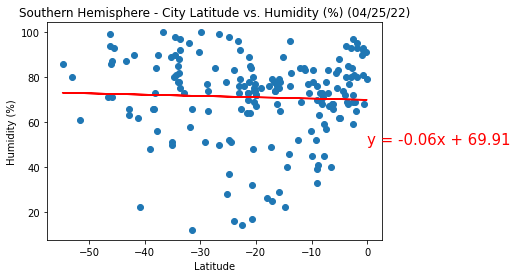

In [26]:
plt.title('Southern Hemisphere - City Latitude vs. Humidity (%) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

x8 = lat_south['Latitude']
y8 = lat_south['Humidity']

plt.scatter(x8, y8)

(slope, intercept, r, p, se) = linregress(x8, y8)
regress_values = x8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x8,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is: 0.0003142346287162865


Text(0, 50, 'y = -0.04x + 61.67')

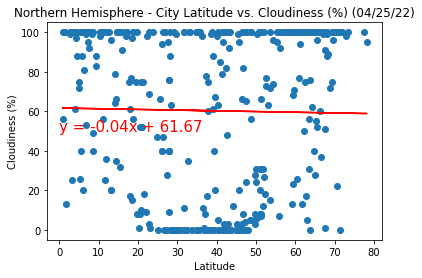

In [27]:
plt.title('Northern Hemisphere - City Latitude vs. Cloudiness (%) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

x9 = lat_north['Latitude']
y9 = lat_north['Cloudiness']

plt.scatter(x9, y9)

(slope, intercept, r, p, se) = linregress(x9, y9)
regress_values = x9 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x9,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is: 0.0017441745618086532


Text(0, 50, 'y = -0.12x + 45.76')

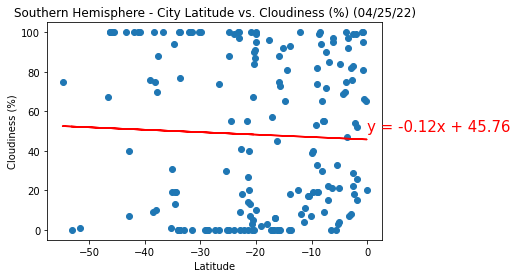

In [28]:
plt.title('Southern Hemisphere - City Latitude vs. Cloudiness (%) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

x10 = lat_south['Latitude']
y10 = lat_south['Cloudiness']

plt.scatter(x10, y10)

(slope, intercept, r, p, se) = linregress(x10, y10)
regress_values = x10 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x10,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is: 0.0029673693296454664


Text(0, 50, 'y = 0.01x + 6.53')

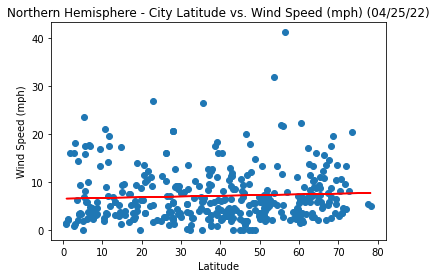

In [29]:
plt.title('Northern Hemisphere - City Latitude vs. Wind Speed (mph) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

x11 = lat_north['Latitude']
y11 = lat_north['Wind Speed']

plt.scatter(x11, y11)

(slope, intercept, r, p, se) = linregress(x11, y11)
regress_values = x11 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x11,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is: 0.017709092367684823


Text(0, 50, 'y = -0.05x + 7.68')

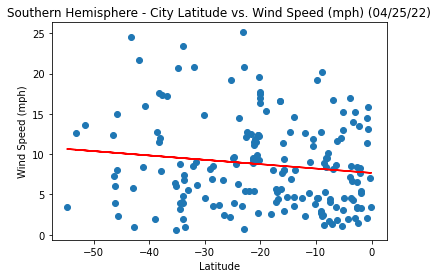

In [30]:
plt.title('Southern Hemisphere - City Latitude vs. Wind Speed (mph) (04/25/22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

x12 = lat_south['Latitude']
y12 = lat_south['Wind Speed']

plt.scatter(x12, y12)

(slope, intercept, r, p, se) = linregress(x12, y12)
regress_values = x12 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x12,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")